# 5회 기출동형 모의고사 통계분석 문제

In [3]:
import pandas as pd
liver = pd.read_csv('../data/27_problem7.csv')
liver

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


- 귀무가설 : 강의 상류와 하류에서 생물 다양성 점수에 차이가 없다.
- 대립가설 : 강의 상류와 하루에서 생물 다양성 점수에 차이가 있다.


In [4]:
from scipy import stats

up = liver['up']
down = liver['down']

stats.ttest_rel(up, down)

Ttest_relResult(statistic=3.3526056764717995, pvalue=0.028499777234053288)

- pvalue는 0.05로 유의수즌 5%하에서 귀무가설은 기각됨. 따라서 생물 다양성 점수에 차이가 있다고 볼 수 있다.

In [7]:
import os
os.listdir('../data/')

['26_problem4.csv',
 '서울특별시 코로나19.csv',
 'lot_quality.csv',
 '26_problem7.csv',
 'student-por.csv',
 '26_problem6.csv',
 '27_problem1.csv',
 'chapter_06_09_NaiveBayes_MultinomialNB.ipynb',
 'student_data.csv',
 'diabetes_for_test.csv',
 'hotel_bookings.csv',
 '26_problem1.csv',
 '27_problem7.csv',
 'indian_liver_patient.csv',
 'pre_student.csv',
 'credit_final.csv',
 'groceries.csv',
 'bodyPerformance.csv',
 'insurance.csv',
 'USArrests.csv',
 'avocado.csv',
 'metalicity',
 'CarPrice_Assignment.csv',
 'student_data_2.csv',
 'cats.csv',
 'breast-cancer.csv',
 'iris.csv',
 'classification.csv',
 'titanic.csv',
 'cereal.csv',
 'mtcars.csv',
 'Skyserver.csv',
 'diabetes.csv',
 '27_problem.csv',
 'student-mat.csv',
 'Cars93.csv',
 '27_problem9.csv',
 'kc_house_data.csv',
 '27_problem8.csv',
 'arima_data.csv',
 'spam.csv']

In [8]:
user_counts = pd.read_csv('../data/27_problem.csv')
user_counts

,temperature,wind,precipitation,user_counts
0,10.400000,4.600000,0.844944,6368
1,5.666667,4.625000,0.040860,5902
2,4.933333,4.725000,0.008696,6226
3,3.400000,2.675000,0.156989,5829
4,8.900000,3.950000,7.988462,7589
...,...,...,...,...
2092,3.500000,2.100000,0.024096,5430
2093,8.233333,2.000000,16.843820,2125
2094,9.500000,3.666667,11.550575,6008
2095,4.800000,1.200000,0.104651,4929


In [10]:
x = user_counts.drop('user_counts', axis=1)
y = user_counts['user_counts']

In [19]:
from sklearn.linear_model import QuantileRegressor

qr_model = QuantileRegressor()

qr_model.fit(x, y)

qr_model.coef_

array([ 2.13487559e+02, -4.58077733e-10, -2.71836829e-10])

In [20]:
x

,temperature,wind,precipitation
0,10.400000,4.600000,0.844944
1,5.666667,4.625000,0.040860
2,4.933333,4.725000,0.008696
3,3.400000,2.675000,0.156989
4,8.900000,3.950000,7.988462
...,...,...,...
2092,3.500000,2.100000,0.024096
2093,8.233333,2.000000,16.843820
2094,9.500000,3.666667,11.550575
2095,4.800000,1.200000,0.104651


In [21]:
qr_model.predict([[10.5, 8.2, 3.5]])

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuantileRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([8278.75423594])

In [28]:
subway = pd.read_csv('../data/27_problem9.csv')
subway

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


- 귀무가설 : 지하철 호선과 월별, 승객 수 간 상관관계는 전부 없다.
- 대립가설 : 지하철 호선과 월별, 승객 수 간 상관관계가 1개 이상 있다.

In [36]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [45]:
formula = 'total ~C(line)*C(month)'
model = ols(formula, subway).fit()
aov_table = anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


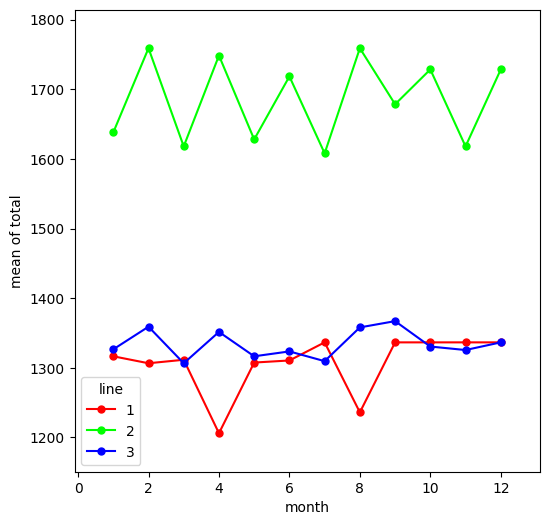

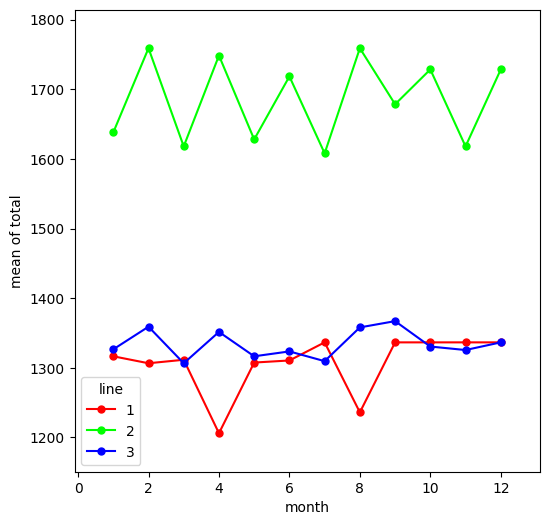

In [47]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

total = subway['total']
line = subway['line']
month = subway['month']

fig, ax = plt.subplots(figsize=(6, 6))

interaction_plot(month, line, total, ms=10, ax=ax)

# 머신러닝

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/27_problem1.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,-0.242598,-0.032176,1.189035,0.778034,-0.327769,0.351492,-0.213423,-0.176871,35.00,0
1189,172288.0,2.100535,-0.014620,-1.602113,0.184332,0.383228,-0.768377,0.207428,-0.299064,0.584681,0.003055,-0.965941,0.225244,0.274983,0.428356,0.793141,-0.104875,-0.647107,4.49,0
1190,172329.0,2.078542,-1.119785,-0.338306,-0.727997,-1.330486,-0.669741,-1.068741,-0.125540,0.191309,0.706048,-0.754812,-0.291895,0.614961,-0.634456,0.267806,1.148287,0.127145,47.22,0
1191,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,150.00,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [16]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

In [17]:
df['Class'].value_counts()

0    993
1    200
Name: Class, dtype: int64

In [18]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,,
0,94258.217523,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,77891.855000,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


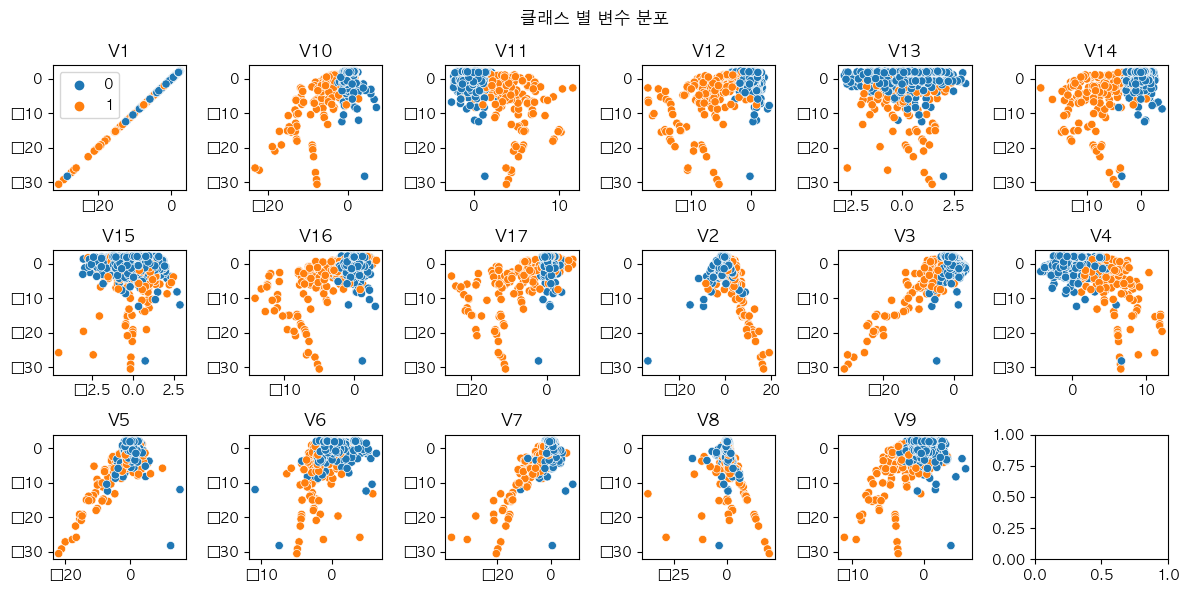

In [19]:
plt.rcParams['font.family'] = 'AppleGothic'
import seaborn as sns

fig ,axes = plt.subplots(nrows=3, ncols=6, figsize=(12, 6))

for idx, col in enumerate(df.columns.difference(['Time', 'Amount', 'Class'])):
    ax = axes[idx//6][idx%6]
    sns.scatterplot(x=col, y='V1', data=df, hue='Class', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend().set_visible(False)

axes[0][0].legend()
fig.suptitle('클래스 별 변수 분포')
fig.tight_layout()
plt.show()

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


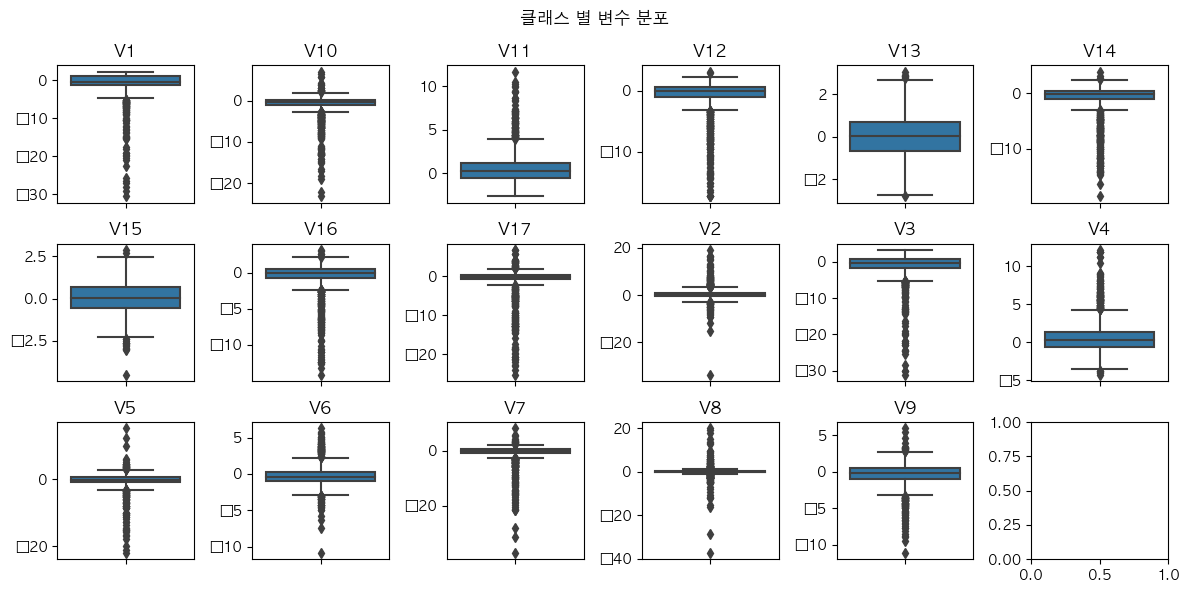

In [20]:
plt.rcParams['font.family'] = 'AppleGothic'
import seaborn as sns

fig ,axes = plt.subplots(nrows=3, ncols=6, figsize=(12, 6))

for idx, col in enumerate(df.columns.difference(['Time', 'Amount', 'Class'])):
    ax = axes[idx//6][idx%6]
    sns.boxplot(y=col, data=df, hue='Class', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('클래스 별 변수 분포')
fig.tight_layout()
plt.show()

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  # Remove the CWD from sys.path while we load stuff.


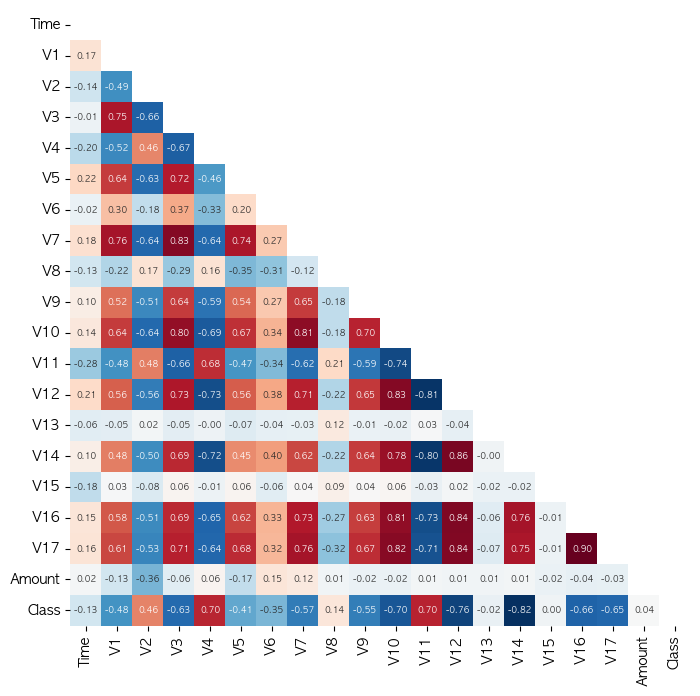

In [21]:
import numpy as np

corr_df = df.corr()

mask = np.triu(np.ones(corr_df.shape, dtype='bool'))
plt.figure(figsize=(8, 8))
sns.heatmap(corr_df, cmap='RdBu_r', cbar=False, annot=True,
           fmt='.2f', annot_kws={'fontsize':6}, mask=mask)

fig.tight_layout()

Class 와 상관관계가 전혀 없는 병수들 도 보이고, V12와 V11, V10과 V7 등 상관관계가 강한 변수들이 많으므로, 적절한 변수 선택이나 변수 추출 등 전처리가 필요해보임

In [22]:
from sklearn.decomposition import PCA



In [23]:
len(df.columns)

20

In [24]:
pca_df = df.drop(['Class'], axis=1)

In [25]:
pca_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,-0.242598,-0.032176,1.189035,0.778034,-0.327769,0.351492,-0.213423,-0.176871,35.00
1189,172288.0,2.100535,-0.014620,-1.602113,0.184332,0.383228,-0.768377,0.207428,-0.299064,0.584681,0.003055,-0.965941,0.225244,0.274983,0.428356,0.793141,-0.104875,-0.647107,4.49
1190,172329.0,2.078542,-1.119785,-0.338306,-0.727997,-1.330486,-0.669741,-1.068741,-0.125540,0.191309,0.706048,-0.754812,-0.291895,0.614961,-0.634456,0.267806,1.148287,0.127145,47.22
1191,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,150.00


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=19)
pca.fit_transform(scaled_df)

array([[-0.26283676, -1.10353399,  0.22000565, ..., -0.00906596,
         0.05278961,  0.05512918],
       [ 1.7734977 , -0.7537094 ,  0.74317519, ..., -0.01927644,
        -0.00787197, -0.01787518],
       [-0.32285642, -1.08804364,  0.10807942, ...,  0.07457687,
         0.05266123,  0.08605617],
       ...,
       [-0.60194128,  0.84208412, -0.20793946, ...,  0.11794728,
         0.03721865, -0.0851761 ],
       [-0.5364512 ,  0.88490518, -0.30802313, ...,  0.09076794,
        -0.13108669, -0.15507413],
       [-0.536738  ,  0.87647079, -0.14214462, ...,  0.02572162,
         0.01532934, -0.02877907]])

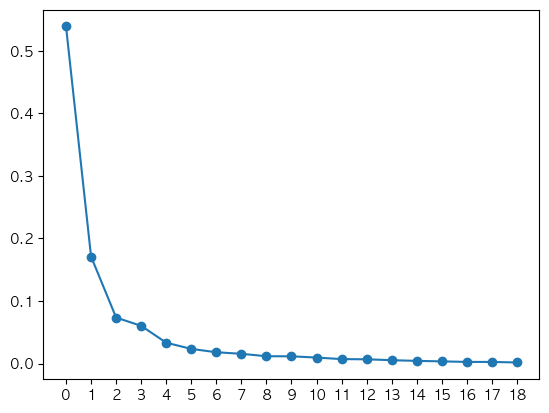

In [31]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xticks([i for i in range(0, 19, 1)])
plt.show()

In [32]:
pca.explained_variance_ratio_[:3].sum()

0.7831577713034102

- scree plot을 그렸을때, 3번째 이후부터 경사가 완만해지고, 설명되는 분산의 누적 비율또한 76%이므로, 3개의 차원으로 축소하는 것이 적절해보인다.

In [33]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(scaled_df)

In [34]:
pca_df

array([[-0.26283676, -1.10353399,  0.2200054 ],
       [ 1.7734977 , -0.75370946,  0.74317561],
       [-0.32285642, -1.08804336,  0.10807766],
       ...,
       [-0.60194128,  0.84208403, -0.20793919],
       [-0.5364512 ,  0.88490545, -0.30802366],
       [-0.536738  ,  0.87647089, -0.14214506]])

- 오버샘플링은 클래스 분포가 적은 데이터를 샘플링하여 만들어내는 기법으로, 정상데이터를 잃지 않는다는 장점이 있으나, 학습 시간이 오래 걸릴 수 있다는 단점이 있다.
- 언더샘플링은 클래스 분포가 많은 데이터를 샘플링하여 줄이는 기법으로, 학습 시간은 줄어드나 정상 데이터를 잃게 될 수 ㅣㅇㅆ다.

1. oversampling - SMOTE
2. undersampling


In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

1. train_test_split
    - scaling
2. resample
3. train
4. validation (time, score)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('Class', axis=1)
y = df['Class']

scaled_x = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, stratify=y, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(954, 19) (954,)
(239, 19) (239,)


In [104]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler()
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [38]:
import time

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_over = XGBClassifier(n_estimator=1000, n_jobs=-1, learning_rate=0.05)

start_time = time.time()

xgb_over.fit(X_train_over, y_train_over)
xgb_over_time = time.time() - start_time
pred = xgb_over.predict(X_test)
print(classification_report(pred, y_test))
print()
print(xgb_over_time)

[19:24:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.93      0.90      0.91        41

    accuracy                           0.97       239
   macro avg       0.95      0.94      0.95       239
weighted avg       0.97      0.97      0.97       239


0.18271207809448242


In [39]:
import time

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_under = XGBClassifier(n_estimator=1000, n_jobs=-1, learning_rate=0.05)

start_time = time.time()

xgb_under.fit(X_train_under, y_train_under)
xgb_under_time = time.time() - start_time
pred = xgb_under.predict(X_test)
print(classification_report(pred, y_test))
print()
print(xgb_under_time)

[19:24:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       190
           1       0.95      0.78      0.85        49

    accuracy                           0.95       239
   macro avg       0.95      0.88      0.91       239
weighted avg       0.95      0.95      0.94       239


0.065032958984375


- accuracy는 0.97, 0.96으로 차이가 거의 없다.

- 시간은 약 2분의 1이하로 감소하였으며, 구동 시간이 중요한 경우에는 언더샘플링 모델을, 성능이 중요한 경우에는 오버샘플링 모델을 사용하는 것이 좋아보인다. 사기를 탐지해야 하는 본 모델의 특성상 recall이 중요한 성능 지표로 보이는데, recall이 0.90, 0.84의 차이가 있으므로 오버샘플링 모델을 사용하는 것이 좋다.

In [40]:
import time

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(n_estimator=1000, n_jobs=-1, learning_rate=0.05)

start_time = time.time()

xgb.fit(X_train, y_train)
xgb_time = time.time() - start_time
pred = xgb.predict(X_test)
print(classification_report(pred, y_test))
print()
print(xgb_time)

[19:24:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       201
           1       0.90      0.95      0.92        38

    accuracy                           0.97       239
   macro avg       0.94      0.96      0.95       239
weighted avg       0.98      0.97      0.98       239


0.12567806243896484


In [107]:
x = X.drop(['Time', 'Amount'], axis=1)

In [108]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbor = NearestNeighbors(n_neighbors=2)
nbrs = neighbor.fit(x)
distance, indices = nbrs.kneighbors(x)
distance

array([[0.        , 0.83686913],
       [0.        , 4.08957649],
       [0.        , 3.73012851],
       ...,
       [0.        , 1.46675149],
       [0.        , 5.07873036],
       [0.        , 1.08043861]])

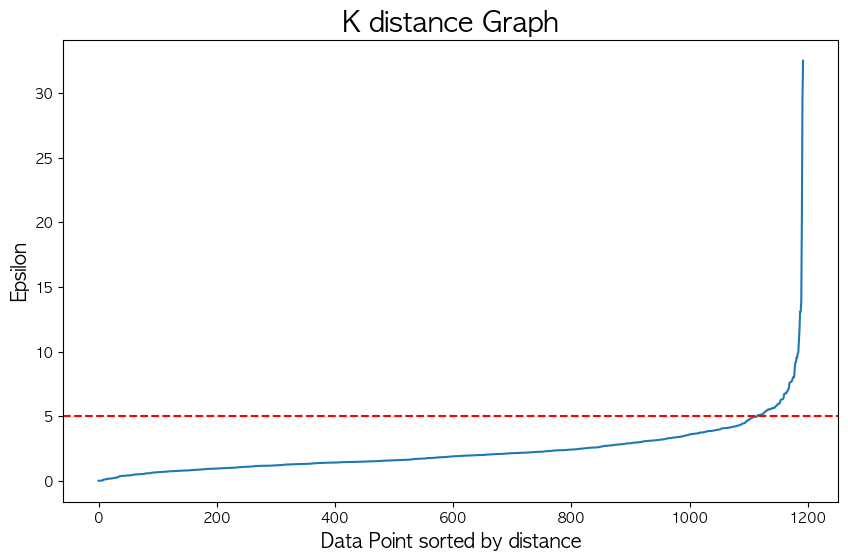

In [110]:
import numpy as np
distances = np.sort(distance, axis=0)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K distance Graph', fontsize=20)
plt.xlabel('Data Point sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.axhline(5, color='r', linestyle='--')
plt.show()

In [153]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

db = DBSCAN(eps=5, min_samples=10).fit(x)
labels = db.labels_
data = pd.DataFrame()
data['Class'] = y.copy()
data['labels'] = labels

In [154]:
y.sum()

200

In [155]:
data.loc[data['labels'] == -1, 'Class'].sum()

16

In [157]:
data.loc[data['labels'] == -1]

,Class,labels
67,1,-1
68,1,-1
84,1,-1
85,1,-1
86,1,-1
90,1,-1
100,1,-1
102,1,-1
220,1,-1
222,1,-1


In [160]:
data.loc[data['labels']==-1] = 1

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data.Class, data.labels)

array([[991,   0],
       [161,  41]])

In [170]:
from sklearn.metrics import classification_report
print(classification_report(data.Class, data.labels))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       991
           1       1.00      0.20      0.34       202

    accuracy                           0.87      1193
   macro avg       0.93      0.60      0.63      1193
weighted avg       0.88      0.87      0.83      1193

